# Deliverable 3 Optimize the model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Preprocess the dataset for optimization

### Attempt 1 - remove additional columns including USE_CASE AND SPECIAL_CIRCUMSTANCES in addition to EIN AND NAME

In [2]:
# Attempt 1 - Drop the non-beneficial ID columns, 'EIN', 'NAME', 'USE_CASE, 'SPECIAL_CONSIDERATIONS'.
# USE_CASE AND SPECIAL CONSIDERATIONS ARE NEW FOR THIS ATTEMPT
application_df = application_df.drop(columns=["EIN", "NAME", "USE_CASE", "SPECIAL_CONSIDERATIONS"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,1,0,5000,1
1,T3,Independent,C2000,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Trust,1,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

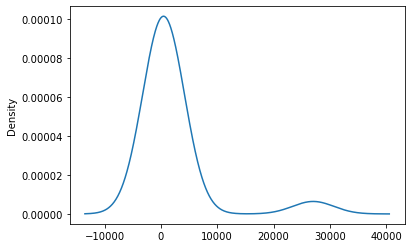

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

### Attempt 1 - increased value counts to less than 1000 (previously less than 500)

In [6]:
# Determine which values to replace if counts are less than 1000
# attempt 1 - increased to 1000 from 500
replace_application = list(application_type_counts[application_type_counts < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classification_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

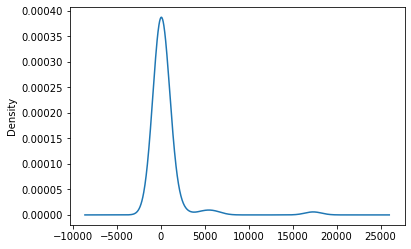

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_value_counts.plot.density()

### Attempt 1 - decreased value counts to less than 500 (previously less than 1000)


In [9]:
# Determine which values to replace if counts are less than 500
# attempt 1 - Decreased from 1000 to 500
replace_class = list(classification_value_counts[classification_value_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'ORGANIZATION',
 'INCOME_AMT']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/rebeccaallison/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X_train_scaled.shape

(25724, 34)

### Attempt 1 - Added 3rd hidden layer and increased the number of neurons to 100/50/15 (previously 80/30) and changed activation function of hidden layers to sigmoid/relu/relu (previously relu/relu


In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 100
nodes_hidden_layer2 = 50
nodes_hidden_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="sigmoid", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

#Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

2022-08-07 13:44:22.850704: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3500      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 15)                765       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 9,331
Trainable params: 9,331
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [19]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

### Attempt 1 - increased number of epochs from 100 to 150

In [20]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=150, callbacks=[cp_callback])

Epoch 1/150
804/804 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.5196
Epoch 2/150
154/804 [====>.........................] - ETA: 0s - loss: 0.6924 - accuracy: 0.5270
Epoch 2: saving model to checkpoints/weights.02hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5260
Epoch 3/150
353/804 [============>.................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5360
Epoch 3: saving model to checkpoints/weights.03hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5309
Epoch 4/150
571/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5331
Epoch 4: saving model to checkpoints/weights.04hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 5/150
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 5: saving model to checkpoints/weights.05hdf5
804/804 [===========================

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 40/150
633/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 40: saving model to checkpoints/weights.40hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 41/150
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 42/150
  1/804 [..............................] - ETA: 1s - loss: 0.6829 - accuracy: 0.5938
Epoch 42: saving model to checkpoints/weights.42hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 43/150
231/804 [=======>......................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5304
Epoch 43: saving model to checkpoints/weights.43hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 44/150
409/804 [==============>...............] - ETA: 0s - loss: 0.6911 - accuracy

 47/804 [>.............................] - ETA: 0s - loss: 0.6883 - accuracy: 0.5525
Epoch 78: saving model to checkpoints/weights.78hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 79/150
261/804 [========>.....................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5304
Epoch 79: saving model to checkpoints/weights.79hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 80/150
472/804 [================>.............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5374
Epoch 80: saving model to checkpoints/weights.80hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 81/150
640/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 81: saving model to checkpoints/weights.81hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 82/150
804/804 [==============================]

499/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 116: saving model to checkpoints/weights.116hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 117/150
701/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 117: saving model to checkpoints/weights.117hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 118/150
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 119/150
 91/804 [==>...........................] - ETA: 0s - loss: 0.6879 - accuracy: 0.5549
Epoch 119: saving model to checkpoints/weights.119hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 120/150
323/804 [===========>..................] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 120: saving model to checkpoints/weights.120hdf5
804/804 [===================

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6942 - accuracy: 0.4727 - 292ms/epoch - 1ms/step
Loss: 0.6942049264907837, Accuracy: 0.4726530611515045


## Attempt 2

In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [23]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME', 'USE_CASE, 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(columns=["EIN", "NAME", "USE_CASE", "SPECIAL_CONSIDERATIONS"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,1,0,5000,1
1,T3,Independent,C2000,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Trust,1,100000-499999,142590,1


In [24]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [25]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

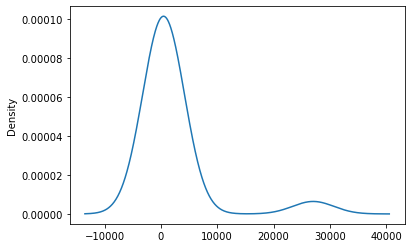

In [26]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [27]:
# Determine which values to replace if counts are less than 1000

replace_application = list(application_type_counts[application_type_counts < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [28]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classification_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

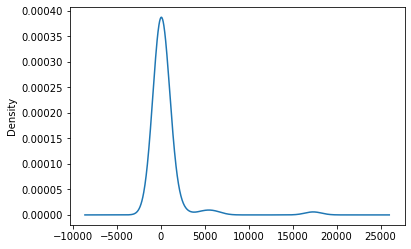

In [29]:
# Visualize the value counts of CLASSIFICATION
classification_value_counts.plot.density()

In [30]:
# Determine which values to replace if counts are less than 500

replace_class = list(classification_value_counts[classification_value_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [31]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'ORGANIZATION',
 'INCOME_AMT']

In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/rebeccaallison/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
X_train_scaled.shape

(25724, 34)

## attempt 2 -- increased hidden layer counts to 100 / 85 / 50 (prev 100/50/15)

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 100
nodes_hidden_layer2 = 85
nodes_hidden_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="sigmoid", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

#Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               3500      
                                                                 
 dense_5 (Dense)             (None, 85)                8585      
                                                                 
 dense_6 (Dense)             (None, 50)                4300      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 16,436
Trainable params: 16,436
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [40]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

## attempt 2 - increased number of epochs to 200 (prev. 150)

In [41]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5236
Epoch 2/200
177/804 [=====>........................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5425
Epoch 2: saving model to checkpoints/weights.02hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5324
Epoch 3/200
365/804 [============>.................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 3: saving model to checkpoints/weights.03hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5315
Epoch 4/200
587/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 4: saving model to checkpoints/weights.04hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 5/200
764/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 5: saving model to checkpoints/weights.05hdf5
804/804 [===========================

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 40/200
636/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 40: saving model to checkpoints/weights.40hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 41/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 42/200
  1/804 [..............................] - ETA: 1s - loss: 0.6876 - accuracy: 0.5625
Epoch 42: saving model to checkpoints/weights.42hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 43/200
230/804 [=======>......................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5360
Epoch 43: saving model to checkpoints/weights.43hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 44/200
407/804 [==============>...............] - ETA: 0s - loss: 0.6912 - accuracy

 84/804 [==>...........................] - ETA: 0s - loss: 0.6900 - accuracy: 0.5406
Epoch 78: saving model to checkpoints/weights.78hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 79/200
260/804 [========>.....................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 79: saving model to checkpoints/weights.79hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 80/200
459/804 [================>.............] - ETA: 0s - loss: 0.6900 - accuracy: 0.5402
Epoch 80: saving model to checkpoints/weights.80hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 81/200
676/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 81: saving model to checkpoints/weights.81hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 82/200
804/804 [==============================]

520/804 [==================>...........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 116: saving model to checkpoints/weights.116hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 117/200
699/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 117: saving model to checkpoints/weights.117hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 118/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 119/200
124/804 [===>..........................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5386
Epoch 119: saving model to checkpoints/weights.119hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 120/200
314/804 [==========>...................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5384
Epoch 120: saving model to checkpoints/weights.120hdf5
804/804 [===================

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 154/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 155/200
178/804 [=====>........................] - ETA: 0s - loss: 0.6901 - accuracy: 0.5399
Epoch 155: saving model to checkpoints/weights.155hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 156/200
349/804 [============>.................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 156: saving model to checkpoints/weights.156hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 157/200
564/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 157: saving model to checkpoints/weights.157hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 158/200
762/804 [===========================>..] - ETA: 0s - loss: 0.6911

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 192/200
399/804 [=============>................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 192: saving model to checkpoints/weights.192hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 193/200
611/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 193: saving model to checkpoints/weights.193hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 194/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 195/200
  1/804 [..............................] - ETA: 1s - loss: 0.6874 - accuracy: 0.5625
Epoch 195: saving model to checkpoints/weights.195hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 196/200
219/804 [=======>......................] - ETA: 0s - loss: 0.6898

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6928 - accuracy: 0.5282 - 289ms/epoch - 1ms/step
Loss: 0.6927747130393982, Accuracy: 0.5281632542610168


## Attempt 3

In [43]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [44]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME', 'USE_CASE, 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(columns=["EIN", "NAME", "USE_CASE", "SPECIAL_CONSIDERATIONS"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,1,0,5000,1
1,T3,Independent,C2000,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Trust,1,100000-499999,142590,1


In [45]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

## Attempt 3 - use Affiliation value for binning (prev. application_type)

In [46]:
affiliation_counts = application_df['AFFILIATION'].value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

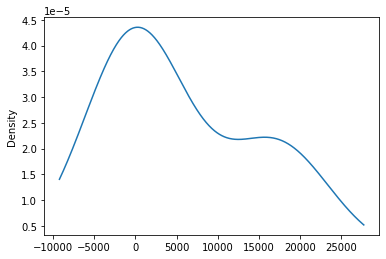

In [47]:
# Visualize the value counts of AFFILIATION
affiliation_counts.plot.density()

In [48]:
# Determine which values to replace if counts are less than 1000

replace_affiliation = list(affiliation_counts[affiliation_counts < 1000].index)

# Replace in dataframe
for aff in replace_affiliation:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

## Attempt 3 - bin by Organization (previously Classification)

In [49]:
# Look at ORGANIZATION value counts for binning
organization_counts = application_df['ORGANIZATION'].value_counts()
organization_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

<AxesSubplot:ylabel='Density'>

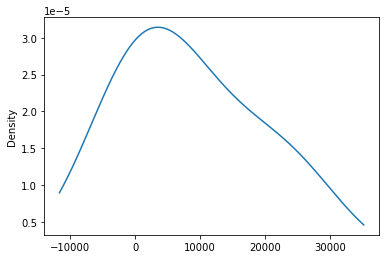

In [50]:
# Visualize the value counts of ORGANIZATION
organization_counts.plot.density()

In [51]:
# Determine which values to replace if counts are less than 500

replace_organization = list(organization_counts[organization_counts < 500].index)

# Replace in dataframe
for org in replace_organization:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(org,"Other")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [52]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'ORGANIZATION',
 'INCOME_AMT']

In [53]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/rebeccaallison/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [56]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [57]:
X_train_scaled.shape

(25724, 105)

In [58]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 100
nodes_hidden_layer2 = 85
nodes_hidden_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="sigmoid", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

#Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               10600     
                                                                 
 dense_9 (Dense)             (None, 85)                8585      
                                                                 
 dense_10 (Dense)            (None, 50)                4300      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 23,536
Trainable params: 23,536
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [61]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [62]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.5258
Epoch 2/200
190/804 [======>.......................] - ETA: 0s - loss: 0.6920 - accuracy: 0.5248
Epoch 2: saving model to checkpoints/weights.02hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5287
Epoch 3/200
370/804 [============>.................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5292
Epoch 3: saving model to checkpoints/weights.03hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 4/200
551/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 4: saving model to checkpoints/weights.04hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 5/200
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 5: saving model to checkpoints/weights.05hdf5
804/804 [===========================

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 40/200
641/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 40: saving model to checkpoints/weights.40hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 41/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 42/200
  1/804 [..............................] - ETA: 1s - loss: 0.7161 - accuracy: 0.3125
Epoch 42: saving model to checkpoints/weights.42hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 43/200
213/804 [======>.......................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 43: saving model to checkpoints/weights.43hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 44/200
385/804 [=============>................] - ETA: 0s - loss: 0.6914 - accuracy

 73/804 [=>............................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5265
Epoch 78: saving model to checkpoints/weights.78hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 79/200
287/804 [=========>....................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 79: saving model to checkpoints/weights.79hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 80/200
458/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5295
Epoch 80: saving model to checkpoints/weights.80hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 81/200
656/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 81: saving model to checkpoints/weights.81hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 82/200
804/804 [==============================]

523/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 116: saving model to checkpoints/weights.116hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 117/200
710/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 117: saving model to checkpoints/weights.117hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 118/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 119/200
123/804 [===>..........................] - ETA: 0s - loss: 0.6901 - accuracy: 0.5401
Epoch 119: saving model to checkpoints/weights.119hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 120/200
308/804 [==========>...................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 120: saving model to checkpoints/weights.120hdf5
804/804 [===================

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 154/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 155/200
181/804 [=====>........................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5363
Epoch 155: saving model to checkpoints/weights.155hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 156/200
357/804 [============>.................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5358
Epoch 156: saving model to checkpoints/weights.156hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 157/200
541/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 157: saving model to checkpoints/weights.157hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 158/200
759/804 [===========================>..] - ETA: 0s - loss: 0.6910

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 192/200
407/804 [==============>...............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5269
Epoch 192: saving model to checkpoints/weights.192hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 193/200
596/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 193: saving model to checkpoints/weights.193hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 194/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 195/200
  1/804 [..............................] - ETA: 2s - loss: 0.6839 - accuracy: 0.5938
Epoch 195: saving model to checkpoints/weights.195hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 196/200
207/804 [======>.......................] - ETA: 0s - loss: 0.6905

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6943 - accuracy: 0.5006 - 313ms/epoch - 1ms/step
Loss: 0.6942864060401917, Accuracy: 0.500641405582428


In [64]:
# Export model to HDF5 file
nn.save("AlphabetSoupCharity_Optimzation.h5")